<a href="https://colab.research.google.com/github/iSHMEET-04/Hospital_Admisson_Prediction/blob/main/hospital_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/filtered_data.csv'
data= pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd


df = pd.DataFrame(data)

monthly_admissions = df.groupby('arrivalmonth')['admissions'].sum().reset_index()


month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_admissions['arrivalmonth'] = pd.Categorical(monthly_admissions['arrivalmonth'],
                                                      categories=month_order, ordered=True)

monthly_admissions = monthly_admissions.sort_values('arrivalmonth')

print(monthly_admissions)


df = pd.merge(df, monthly_admissions, on='arrival_month', suffixes=('', '_total'), how='left')

gender_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
month_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


encoded_gender = gender_encoder.fit_transform(df[['gender']])
encoded_month = month_encoder.fit_transform(df[['arrivalmonth']])


scaler = StandardScaler()
scaled_age = scaler.fit_transform(df[['age']])


X = np.hstack((encoded_month, scaled_age, encoded_gender))


admissions_mapping = df.groupby('arrivalmonth').size().to_dict()
df['admissions_per_row'] = df['arrivalmonth'].map(admissions_mapping)


y = df['admissions_per_row'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


specific_month = 'January'
specific_age = 28
specific_gender = 'Male'


input_encoded_month = month_encoder.transform(np.array([[specific_month]]))
input_encoded_gender = gender_encoder.transform(np.array([[specific_gender]]))


input_scaled_age = scaler.transform([[specific_age]])


input_features = np.hstack((input_encoded_month, input_scaled_age, input_encoded_gender))


predicted_admissions = model.predict(input_features)
print(f'Predicted number of admissions for {specific_month}, Age: {specific_age}, Gender: {specific_gender}: {predicted_admissions[0]}')


Mean Squared Error (MSE): 0.0
Predicted number of admissions for January, Age: 28, Gender: Male: 42749.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer


df = pd.DataFrame(data)


gender_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
month_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_gender = gender_encoder.fit_transform(df[['gender']])
encoded_month = month_encoder.fit_transform(df[['arrivalmonth']])


scaler = StandardScaler()
scaled_age = scaler.fit_transform(df[['age']])

X = np.hstack((encoded_month, scaled_age, encoded_gender))


admissions_mapping = df.groupby('arrivalmonth').size().to_dict()
df['admissions_per_row'] = df['arrivalmonth'].map(admissions_mapping)


y = df['admissions_per_row'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

specific_month = 'January'
specific_age = 28
specific_gender = 'Male'


input_encoded_month = month_encoder.transform(np.array([[specific_month]]))
input_encoded_gender = gender_encoder.transform(np.array([[specific_gender]]))


input_scaled_age = scaler.transform([[specific_age]])


input_features = np.hstack((input_encoded_month, input_scaled_age, input_encoded_gender))


predicted_admissions = model.predict(input_features)
print(f'Predicted number of admissions for {specific_month}, Age: {specific_age}, Gender: {specific_gender}: {predicted_admissions[0]}')


Mean Squared Error (MSE): 5.722278126044296e-22
Predicted number of admissions for January, Age: 28, Gender: Male: 42748.99999999997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

test_inputs = [
    ('January', 28, 'Male'),
    ('February', 32, 'Female'),
    ('March', 45, 'Male'),
    ('January', 50, 'Female'),
    ('February', 25, 'Male'),
]

for month, age, gender in test_inputs:
    input_data = pd.DataFrame({
        'arrivalmonth': [month],
        'age': [age],
        'gender': [gender]
    })

    input_month_encoded = encoder_month.transform(input_data[['arrivalmonth']])
    input_gender_encoded = encoder_gender.transform(input_data[['gender']])

    input_scaled_age = scaler.transform(input_data[['age']])


    input_features = np.hstack((input_month_encoded, input_scaled_age, input_gender_encoded))

    predicted_admissions = model.predict(input_features)
    print(f'Predicted number of admissions for {month}, Age: {age}, Gender: {gender}: {predicted_admissions[0]}')






Predicted number of admissions for January, Age: 28, Gender: Male: 42748.99999999997
Predicted number of admissions for February, Age: 32, Gender: Female: 38201.999999999985
Predicted number of admissions for March, Age: 45, Gender: Male: 56387.99999999997
Predicted number of admissions for January, Age: 50, Gender: Female: 42748.999999999985
Predicted number of admissions for February, Age: 25, Gender: Male: 38201.99999999997


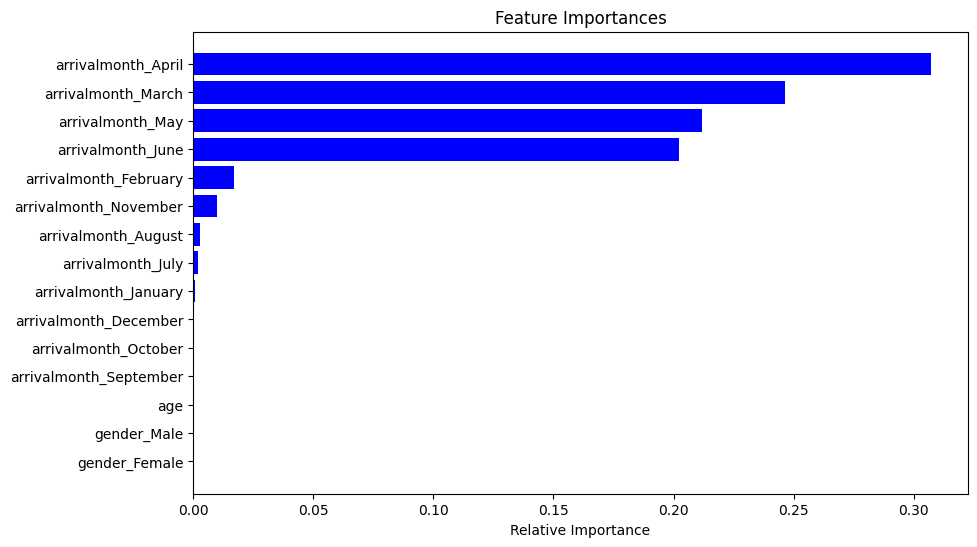

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
features = list(encoder_month.get_feature_names_out()) + list(encoder_gender.get_feature_names_out()) + ['age']


num_features = min(len(features), len(importances))
features = features[:num_features]
importances = importances[:num_features]


indices = np.argsort(importances)


plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')


plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')
plt.show()
